# The Home Equity dataset

In [1]:
import os
os.chdir('/home/ilirsheraj/Ankara Bootcamp/Week 2/Assignment 2')

In [2]:
os.getcwd()

'/home/ilirsheraj/Ankara Bootcamp/Week 2/Assignment 2'

# 1 - Data Description

All the information about this dataset was taken from Kaggle. Below is the explanation provided by the website.

The consumer credit department of a bank wants to automate the decisionmaking process for approval of home equity lines of credit. To do this, they will follow the recommendations of the Equal Credit Opportunity Act to create an empirically derived and statistically sound credit scoring model. The model will be based on data collected from recent applicants granted credit through the current process of loan underwriting. The model will be built from predictive modeling tools, but the created model must be sufficiently interpretable to provide a reason for any adverse actions (rejections).

Content
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable indicating whether an applicant eventually defaulted or was seriously delinquent. This adverse outcome occurred in 1,189 cases (20%). For each applicant, 12 input variables were recorded.

BAD: 1 = applicant defaulted on loan; 0 = applicant paid the loan
LOAN: Amount of the loan requested
MORTDUE: Amount due on existing mortgage
VALUE: Value of current property
REASON: DebtCon = debt consolidation; HomeImp = home improvement
JOB: Six Occupational categories
YOJ: Years at present job
DEROG: Number of major derogatory reports
DELINQ: Number of delinquent credit lines
CLAGE: Age of oldest credit line (in months)
NINQ: Number of recent credit lines
CLNO: Number of credit lines
DEBTINC: Debt-to-Income Ratio

The data set can be used to predict whether a customer will be able to pay the loan based on the above predictors, however, at the moment, the data will be only explored and not used for modeling

# 2 - Loading and Exploring the Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

## a) Load the File

In [7]:
loan = pd.read_csv("hmelq.csv")

In [15]:
loan.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


## b) Check the Dimensions and Summarize

In [22]:
# Let's check the dimensions of the data set
loan.shape

(3576, 13)

There are 3576 rows (customers) and 13 columns, i.e., 12 predictors and one response (bad).
Since bad variable is a binary one, i removed it because it has no meaning in summary

In [43]:
loan.drop('bad', axis=1).describe()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3262.000000,3512.000000,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
mean,18529.697987,74013.907992,101076.922759,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,11262.834060,44016.833772,54865.275351,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,11000.000000,46700.250000,65753.000000,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,16200.000000,65858.000000,89183.000000,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,23100.000000,91717.000000,118928.250000,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
max,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


In [25]:
# Now let's see whether there are any NaN values for each column in the data frame
loan.isnull().sum(axis = 0)

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

The information above shows that many predictors have a lot of NaN values, so if the data is to be used for prediction purposes, more careful deliberations need to be carried out to either impute some of those values, or to decrease the number of samples used in analysis. For our exploratory purposes, each column can be dealt individually. However, lets explore that option as well

In [66]:
# Remove all NaN values from the entire data frame
import numpy
x = loan.dropna()
x.shape

(2018, 13)

In [33]:
# CHeck the percetnage of lost data if all NaN are removed
(3576 - 2018)/3576

0.4356823266219239

The above command shows that we loose almost 44% of the data if we remove the NAN values for all variables, therefore this requires further considerations.

In [44]:
# Summarize the clean data frame
x.drop('bad', axis=1).describe()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,19010.257681,76337.035183,106899.244797,9.003964,0.150149,0.264123,180.645020,1.037661,22.265114,34.105829
std,10768.607345,44476.368189,54026.707096,7.573012,0.580421,0.789816,84.420116,1.578414,9.457238,8.438411
min,1700.000000,5076.000000,23031.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,4.030000
25%,12000.000000,49577.250000,71287.250000,3.000000,0.000000,0.000000,118.205000,0.000000,16.000000,29.295500
50%,16900.000000,67595.000000,94514.000000,7.000000,0.000000,0.000000,176.670000,0.000000,21.000000,34.949000
75%,23600.000000,92922.750000,121220.750000,13.000000,0.000000,0.000000,229.692500,2.000000,27.000000,38.952000
max,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.230000,13.000000,64.000000,144.189000


There are two data types, categorical and continous
Categorical Data
BAD: 1 = applicant defaulted on loan; 0 = applicant paid the loan
REASON: DebtCon = debt consolidation; HomeImp = home improvement
JOB: Six Occupational categories
DEROG: Number of major derogatory reports 
DELINQ: Number of delinquent credit lines
NINQ: Number of recent credit lines 
CLNO: Number of credit lines

COntinous Variables
LOAN: Amount of the loan requested 
MORTDUE: Amount due on existing mortgage 
VALUE: Value of current property 
YOJ: Years at present job 
CLAGE: Age of oldest credit line (in months) 
DEBTINC: Debt-to-Income Ratio

## c) Loan Payment compared to other variables

In [41]:
# Lets summarize in a table the number of people who payed the morgage (1), and those who failed to pay (0)
loan_payment_job = pandas.crosstab(index = loan["bad"], columns = loan["bad"])
loan_payment_job.index = ["Payed", "Failed"]
loan_payment_job

bad,0,1
Payed,2863,0
Failed,0,713


In [42]:
# Only about 20% of the people payed their morgage on time
713/(713+2863)

0.1993847874720358

The main aim of the dataset is to use the above predictors to determine whether a person who takes a loan will be able to pay it back or not, therfore the categories of payed/defaulted are important. Lets explore the number of people who were able to pay (1) and those who defaulted (0).

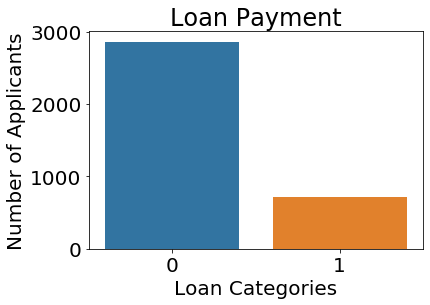

In [61]:
# Number of people who payed or defaulted
sns.countplot("bad", data = loan)
plt.title('Loan Payment')
plt.xlabel('Loan Categories')
plt.ylabel('Number of Applicants')
plt.rcParams.update({'font.size': 18})
plt.show()

In [4]:
import numpy as np
import scipy.stats as stats
from matplotlib.pyplot import plot
import pandas as pd
import pylab
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy import stats

Next, tet's see the distributions of continous predictors in histograms. The titles of each histogram are as follows: 
CLAGE: Age of oldest credit line (in months)
CLNO: Number of credit lines
DEBTINC: Debt-to-Income Ratio
LOAN: Amount of the loan requested
MORTDUE: Amount due on existing mortgage
VALUE: Value of current property
YOJ: Years at present job

From the histograms below, it is clearly seen that most of the data are right-skewed

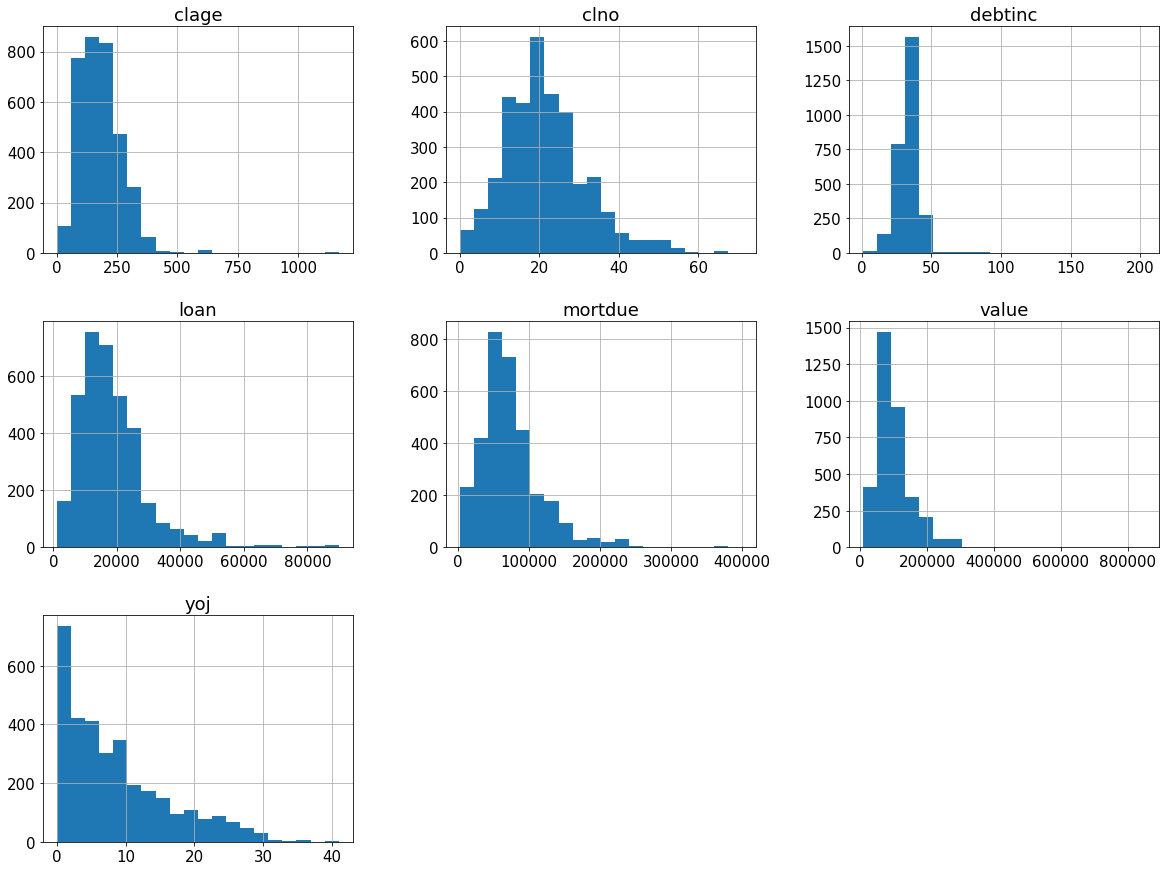

In [198]:
# Lets see the distribution of mumerical data (The rest are categorical)
plt.rcParams["figure.figsize"] = (20,15)
loan_num = loan[['loan','mortdue', "value", "yoj","clage", "clno", "debtinc"]]
loan_num.hist(bins=20)
plt.show()

The above data were normalized columnwise and their distributions are shown below. This makes reading easier because the values are decreased within a certain range.

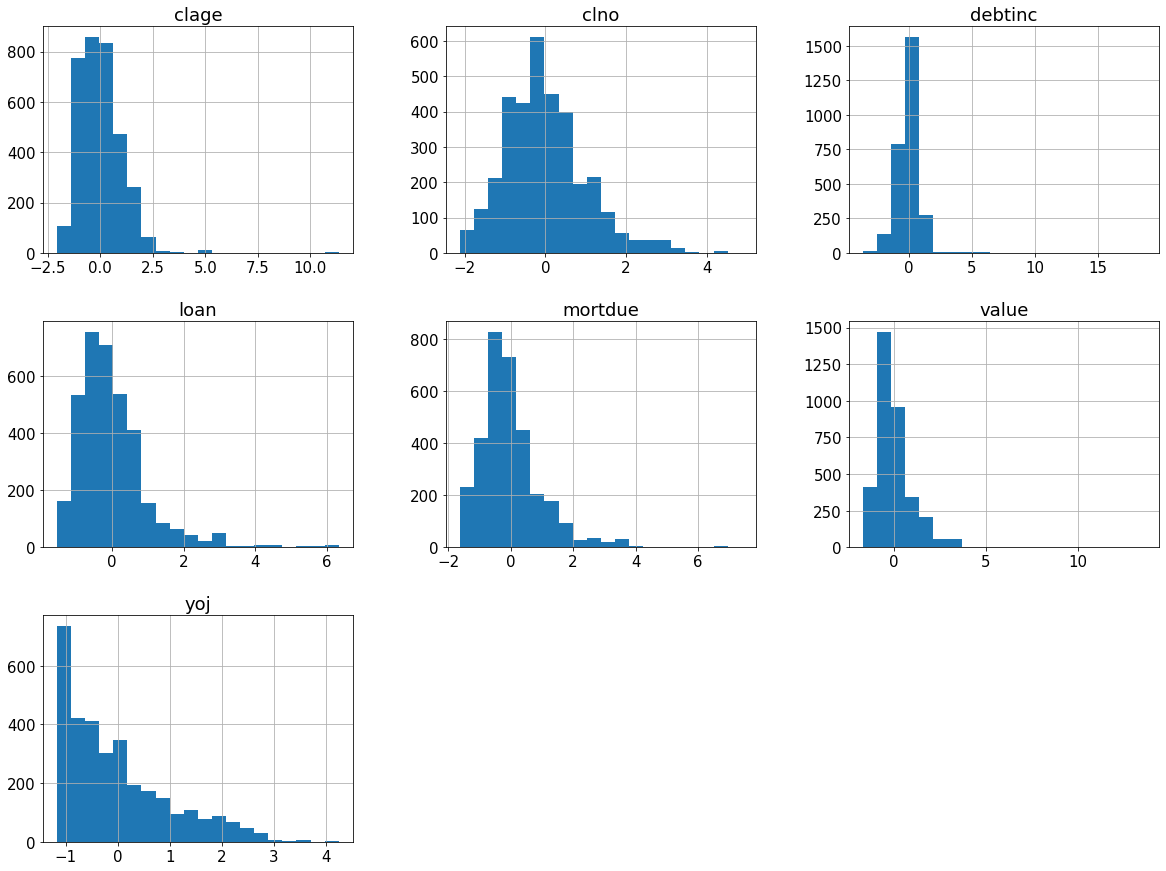

In [212]:
# Lets Normalize the data and see whether they become more normaly distributed
df = loan.set_index('bad')
df.head()
cd = df[['loan','mortdue', "value", "yoj","clage","clno", "debtinc"]]
normalized_df=(cd-cd.mean())/cd.std()
plt.rcParams["figure.figsize"] = (20,15)
loan_num = normalized_df[['loan','mortdue', "value", "yoj","clage", "clno", "debtinc"]]
loan_num.hist(bins=20)
plt.show()

In [10]:
df = loan.set_index('bad')
df.head()
cd = df[['loan','mortdue', "value", "yoj","clage","clno", "debtinc"]]
normalized_df=(cd-cd.mean())/cd.std()# Reattach the classification column again
modified = normalized_df.reset_index()
modified.describe()

,bad,loan,mortdue,value,yoj,clage,clno,debtinc
count,3576.000000,3.576000e+03,3.262000e+03,3.512000e+03,3.264000e+03,3.397000e+03,3.443000e+03,2.809000e+03
mean,0.199385,-1.648569e-16,-5.925501e-17,-2.135725e-16,7.872923e-16,-1.792306e-16,-6.952195e-17,-2.824725e-15
std,0.399594,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-1.547541e+00,-1.621991e+00,-1.681882e+00,-1.167097e+00,-2.059841e+00,-2.115283e+00,-3.653976e+00
25%,0.000000,-6.685438e-01,-6.205275e-01,-6.438302e-01,-7.706936e-01,-7.377436e-01,-6.399924e-01,-5.177468e-01
50%,0.000000,-2.068483e-01,-1.852907e-01,-2.167842e-01,-2.421555e-01,-7.112437e-02,-1.482289e-01,1.010019e-01
75%,0.000000,4.057861e-01,4.021891e-01,3.253666e-01,5.506515e-01,5.843539e-01,4.418872e-01,5.637116e-01
max,1.000000,6.336798e+00,7.395718e+00,1.365022e+01,4.250418e+00,1.135225e+01,4.867758e+00,1.870264e+01


# 3 - Preliminary Analysis

In this section, preliminary analysis will be performed such as the relations between certain predictors and the ability to pay the loan.

### 1 - Loan Amount vs Ability to Pay Back

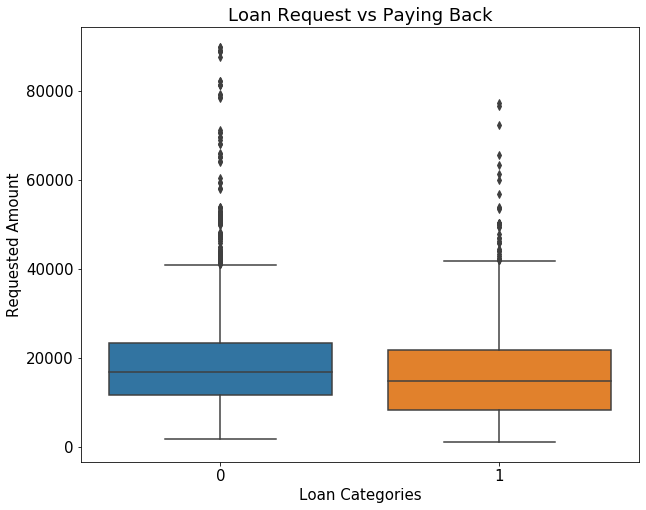

In [215]:
# Success in paying the loan according to requested debt amount
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x = "bad", y = "loan", data = loan)
plt.rcParams.update({'font.size': 15})
plt.title('Loan Request vs Paying Back')
plt.xlabel('Loan Categories')
plt.ylabel('Requested Amount')
plt.show()

In [199]:
stats.describe(loan["loan"])

DescribeResult(nobs=3576, minmax=(1100, 89900), mean=18529.697986577183, variance=126851431.06960154, skewness=2.049604648222838, kurtosis=7.101453299904799)

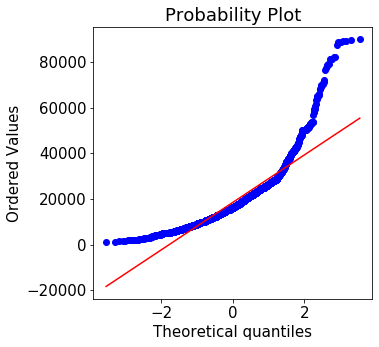

In [202]:
# Normal Probability Plot: Checks whether the data is normally distributed
fig, ax = plt.subplots(figsize=(5, 5))
stats.probplot(loan["loan"], dist = "norm", plot = pylab)
pylab.show()

#The plot proves once again the results of the normality test above

This graph shows that people who took more debt, failed more than people who took less to pay it back, which makes sense. The data is not normally distributed and there are many outliers as usually happens in finance. However, if we use median as our statistic, we can see that people who failed to pay the loan borrowed 16800, while those who paid borrowed 14700, less than 2100.

In [13]:
# Those who defaulted
loan_loan = loan[["bad","loan"]]
loan_loan[loan_loan['bad']==0].drop('bad', axis=1).describe()

,loan
count,2863.000000
mean,18931.645127
std,11049.515848
min,1700.000000
25%,11700.000000
50%,16800.000000
75%,23400.000000
max,89900.000000


In [14]:
# Those who payed back
loan_loan = loan[["bad","loan"]]
loan_loan[loan_loan['bad']==1].drop('bad', axis=1).describe()

,loan
count,713.000000
mean,16915.708275
std,11954.222379
min,1100.000000
25%,8400.000000
50%,14700.000000
75%,21800.000000
max,77200.000000


### 2 - Current Property Value vs Ability to Pay Back

Lets see the relation between the ability to repay the loan and the current property value.

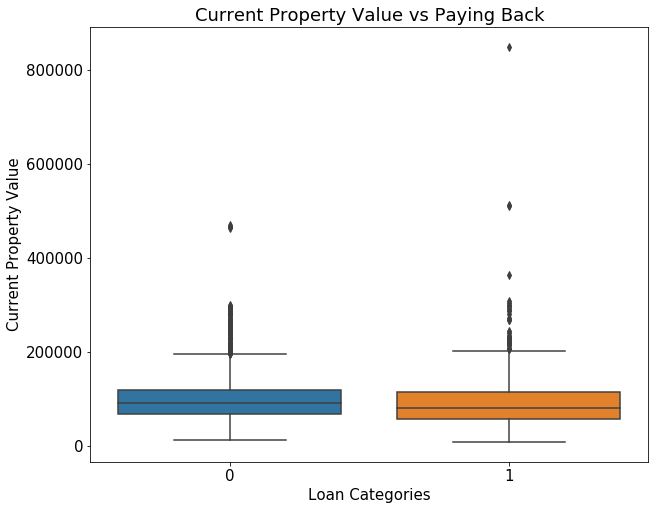

In [216]:
# Success in paying the loan according to Current Property Value
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x = "bad", y = "value", data = loan)
plt.rcParams.update({'font.size': 15})
plt.title('Current Property Value vs Paying Back')
plt.xlabel('Loan Categories')
plt.ylabel('Current Property Value')
plt.show()

In [15]:
# THose who defaulted
loan_loan = loan[["bad","value"]]
loan_loan[loan_loan['bad']==0].drop('bad', axis=1).describe()

,value
count,2859.000000
mean,102394.448489
std,52031.226164
min,12414.000000
25%,67724.500000
50%,90805.000000
75%,119338.000000
max,469748.000000


In [17]:
# Those who payed back
loan_loan = loan[["bad","value"]]
loan_loan[loan_loan['bad']==1].drop('bad', axis=1).describe()

,value
count,653.000000
mean,95308.460184
std,65588.405366
min,8800.000000
25%,57000.000000
50%,81020.000000
75%,116160.000000
max,850000.000000


Surprisingly, those who did not pay the loan on time had more property than those who did.

### 3 - Loan vs Due Morgage and Property Value

First lets see possible correlation between requested loan and the person's Due Morgage and Current Property Value. We expect a positive correlation between loan amount and Due Morgage because the bigger the debt, the more difficult it is to pay.

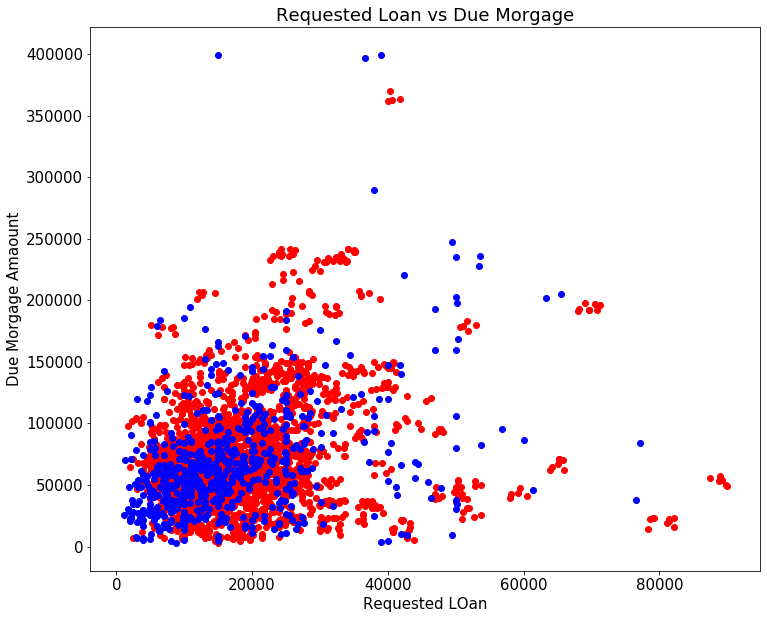

In [172]:
# Requested Amount vs Due Morgage
colors = {0: "r", 1: "b"}
fig, ax = plt.subplots(figsize=(12, 10))
for i in range(len(loan['loan'])):
    ax.scatter(loan['loan'][i], loan['mortdue'][i],color=colors[loan['bad'][i]])
# set a title and labels
ax.set_title("Requested Loan vs Due Morgage")
ax.set_xlabel("Requested LOan")
ax.set_ylabel("Due Morgage Amaount")
plt.show()

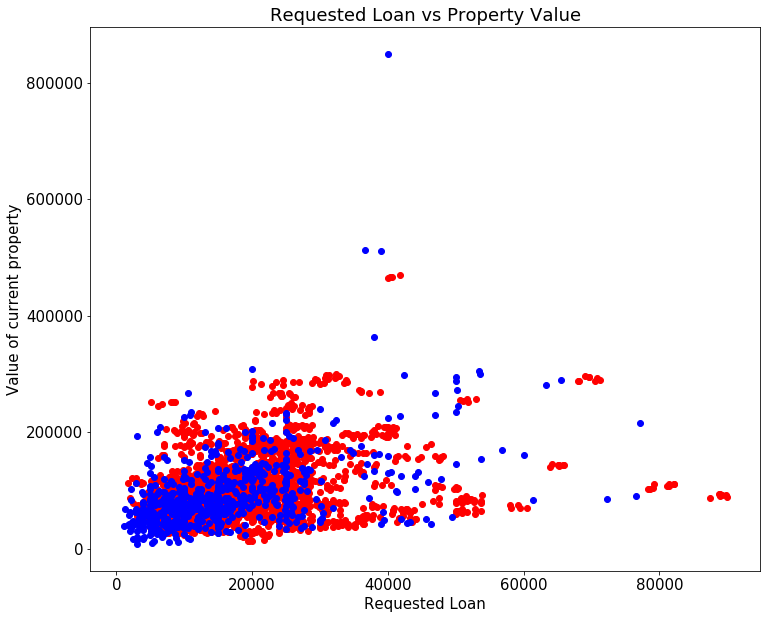

In [174]:
# Requested Amount vs Property Value
colors = {0: "r", 1: "b"}
fig, ax = plt.subplots(figsize=(12, 10))
for i in range(len(loan['loan'])):
    ax.scatter(loan['loan'][i], loan['value'][i],color=colors[loan['bad'][i]])
# set a title and labels
ax.set_title("Requested Loan vs Property Value")
ax.set_xlabel("Requested Loan")
ax.set_ylabel("Value of current property")
plt.show()

### 4 - Purpose of Taking a Loan

Customers had two reasons for taking a loan, DebtCon (debt consolidation) and HomeImp (home improvement).

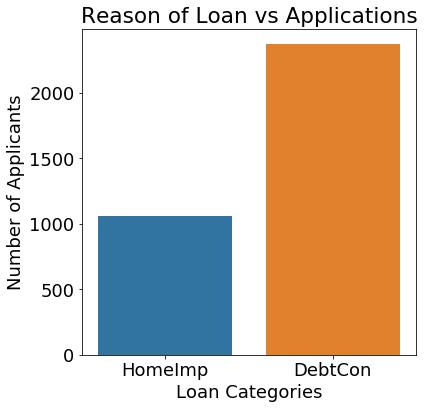

In [219]:
# Number of applications according to purpose
ig, ax = plt.subplots(figsize=(6, 6))
sns.countplot("reason", data = loan)
plt.title('Reason of Loan vs Applications')
plt.xlabel('Loan Categories')
plt.ylabel('Number of Applicants')
plt.rcParams.update({'font.size': 18})
plt.show()

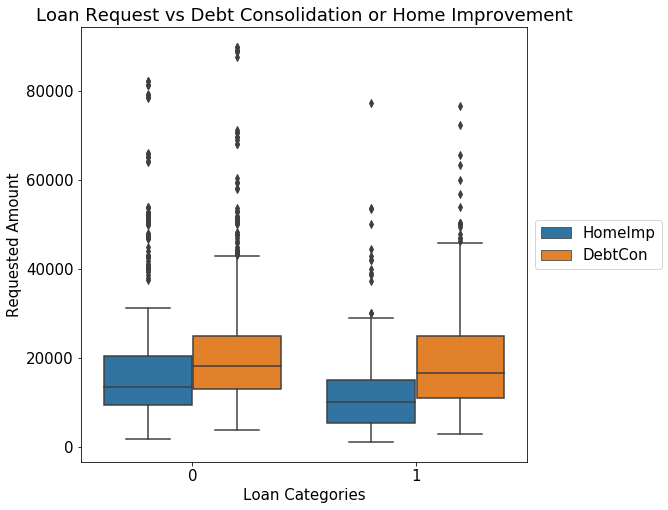

In [241]:
# Success in paying the loan according to reason of taking Debt
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(x = "bad", y = "loan", hue = "reason", data = loan)
plt.rcParams.update({'font.size': 15})
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Loan Request vs Debt Consolidation or Home Improvement')
plt.xlabel('Loan Categories')
plt.ylabel('Requested Amount')
plt.show()

The figures show that more people took loans for debt consolidation than home improvement. In addition, people took higher loan amounts for debt consolidation than home improvements, and this category was higher among those who were able to pay and failed to pay when compared according to the ability of repaying back.

### 5 - Loan Request vs Requester's Job

Lets explore the numbers of debt request and dloan amount as related to job categories. There are six job categories and a number of them are not known.

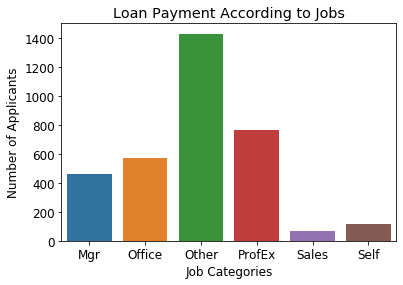

In [151]:
# Number of application according to job
sns.countplot("job", data = loan)
plt.title('Loan Payment According to Jobs')
plt.xlabel('Job Categories')
plt.ylabel('Number of Applicants')
plt.rcParams.update({'font.size': 10})
plt.show()

The bar chart shows that the highest number of debt requests were donwe by "other" category, which seems to be a collection of jobs.

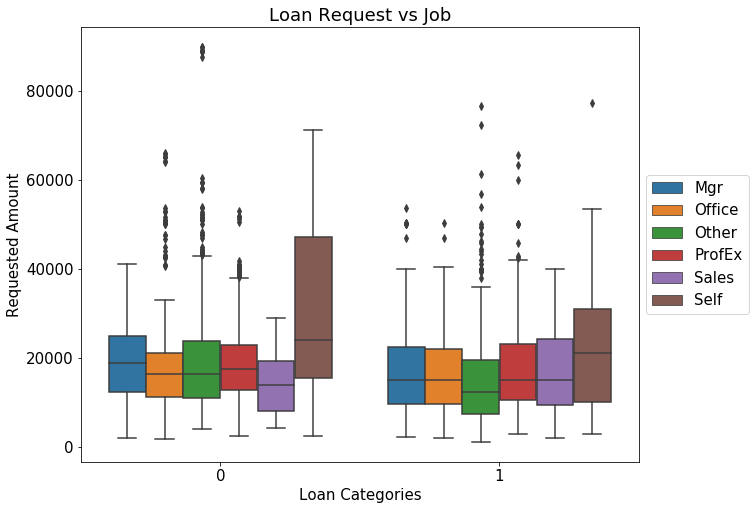

In [222]:
# Barchart for requested loan vs Job Category
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x = "bad", y = "loan", hue = "job", data = loan)
plt.rcParams.update({'font.size': 15})
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Loan Request vs Job')
plt.xlabel('Loan Categories')
plt.ylabel('Requested Amount')
plt.show()

THe highest amount of loan requests came from people who were working on their own, some sorts of private jobs, who were also the ones who had the highest due amounts (the following boxlots).

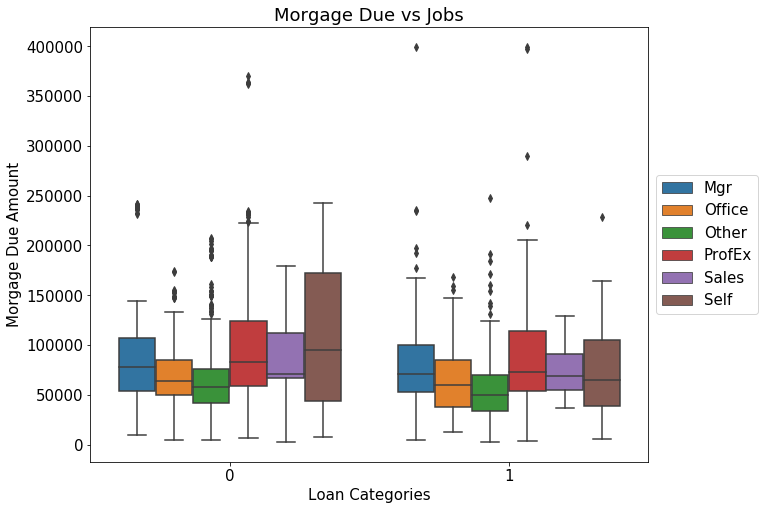

In [223]:
# Barplot regarding due morgage vs Job Category
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x = "bad", y = "mortdue", hue = "job", data = loan)
plt.rcParams.update({'font.size': 15})
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Morgage Due vs Jobs')
plt.xlabel('Loan Categories')
plt.ylabel('Morgage Due Amount')
plt.show()

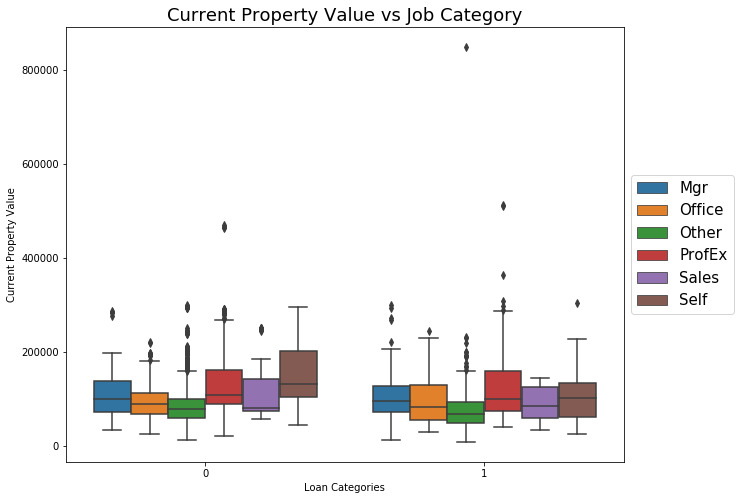

In [23]:
# Success in paying the loan according to Job Category
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x = "bad", y = "value", hue = "job", data = loan)
plt.rcParams.update({'font.size': 15})
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Current Property Value vs Job Category')
plt.xlabel('Loan Categories')
plt.ylabel('Current Property Value')
plt.show()

### 6 - Loan Repayment and Number of Recent Credit Lines

I do not know much about these terms

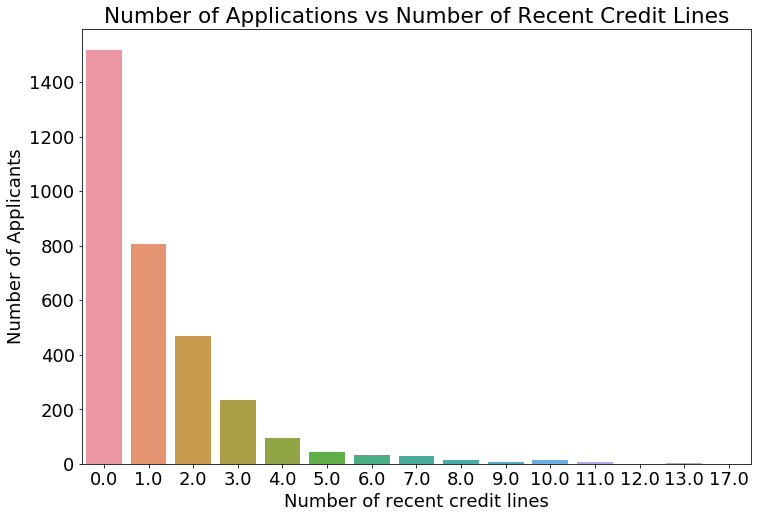

In [148]:
# Number of loan applications vs Number of recent credit lines
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot("ninq", data = loan)
plt.title('Number of Applications vs Number of Recent Credit Lines')
plt.xlabel('Number of recent credit lines')
plt.ylabel('Number of Applicants')
plt.rcParams.update({'font.size': 18})
plt.show()

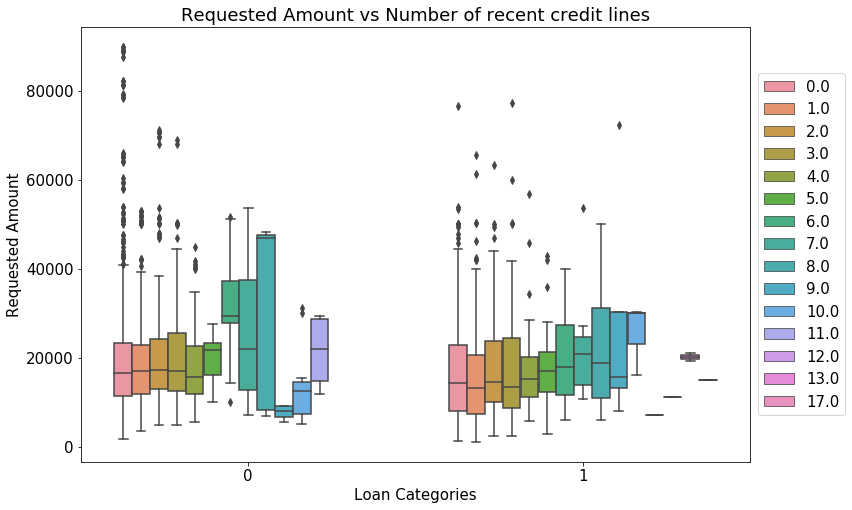

In [225]:
# Requested loan amount vs Number of recent credit lines
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x = "bad", y = "loan", hue = "ninq", data = loan)
plt.rcParams.update({'font.size': 15})
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Requested Amount vs Number of recent credit lines')
plt.xlabel('Loan Categories')
plt.ylabel('Requested Amount')
plt.show()

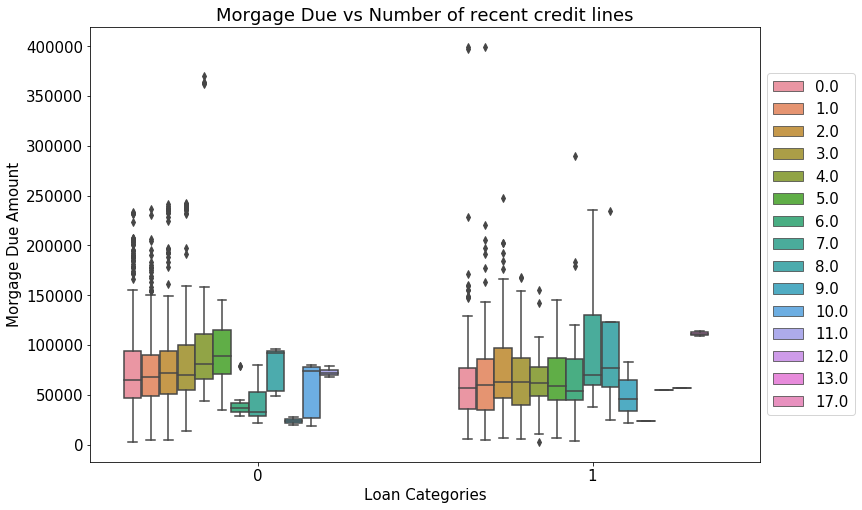

In [162]:
# Morgage Due Amount vs Number of recent credit lines
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x = "bad", y = "mortdue", hue = "ninq", data = loan)
plt.rcParams.update({'font.size': 15})
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Morgage Due vs Number of recent credit lines')
plt.xlabel('Loan Categories')
plt.ylabel('Morgage Due Amount')
plt.show()

### 7 - Loan Relayment vs Derrogatory Reports

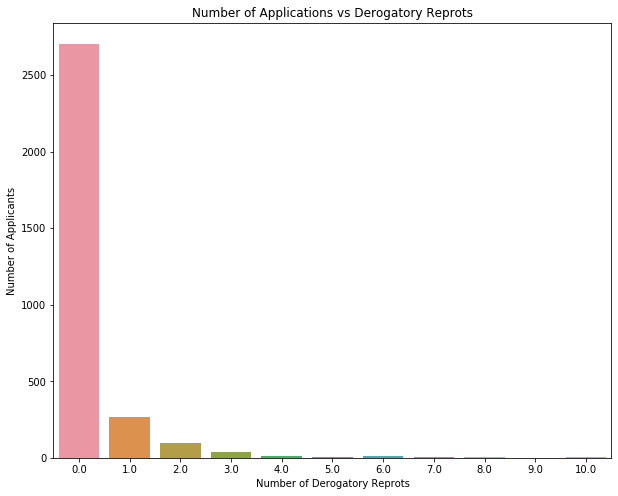

In [165]:
# Number of application vs Derogatory Reports
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot("derog", data = loan)
plt.title('Number of Applications vs Derogatory Reprots')
plt.xlabel('Number of Derogatory Reprots')
plt.ylabel('Number of Applicants')
plt.rcParams.update({'font.size': 12})
plt.show()

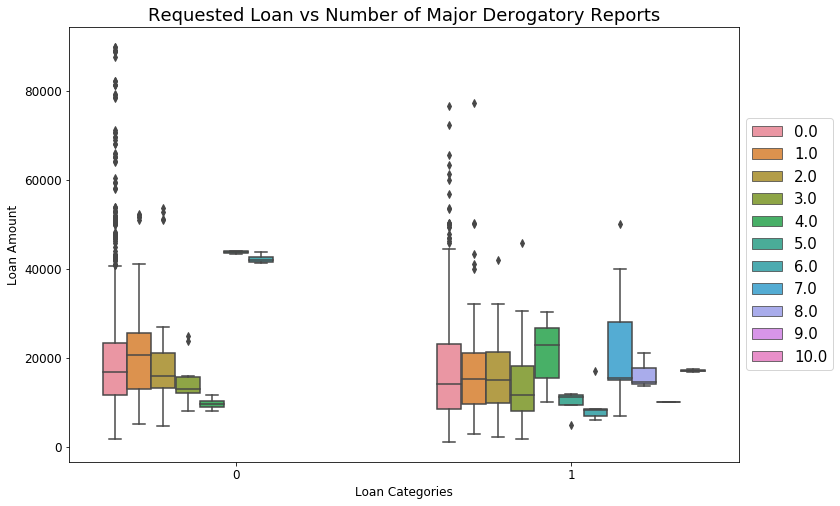

In [166]:
# Loan Payment According to the Number of major derogatory reports
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x = "bad", y = "loan", hue = "derog", data = loan)
plt.rcParams.update({'font.size': 15})
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Requested Loan vs Number of Major Derogatory Reports')
plt.xlabel('Loan Categories')
plt.ylabel('Loan Amount')
plt.show()

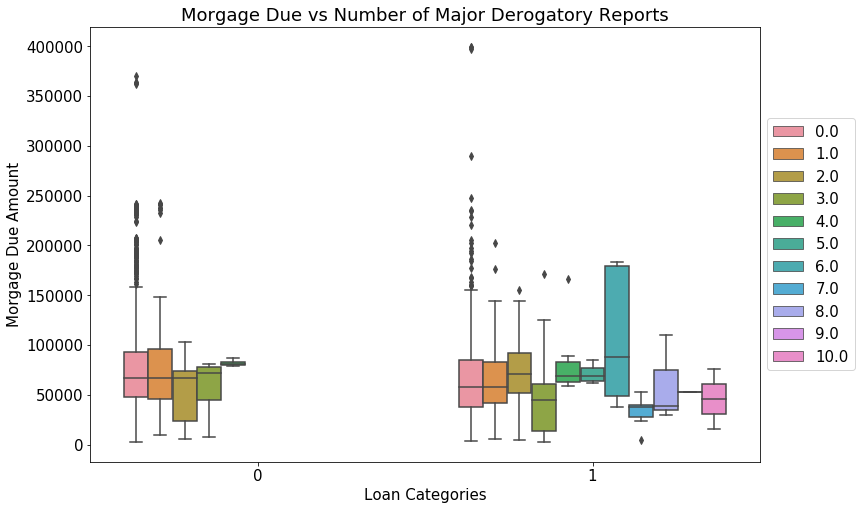

In [167]:
# Morgage Due Amount According to the Number of major derogatory reports
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x = "bad", y = "mortdue", hue = "derog", data = loan)
plt.rcParams.update({'font.size': 15})
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Morgage Due vs Number of Major Derogatory Reports')
plt.xlabel('Loan Categories')
plt.ylabel('Morgage Due Amount')
plt.show()

### 8 - Loan Repayment vs Number of Delinquent Credit Lines

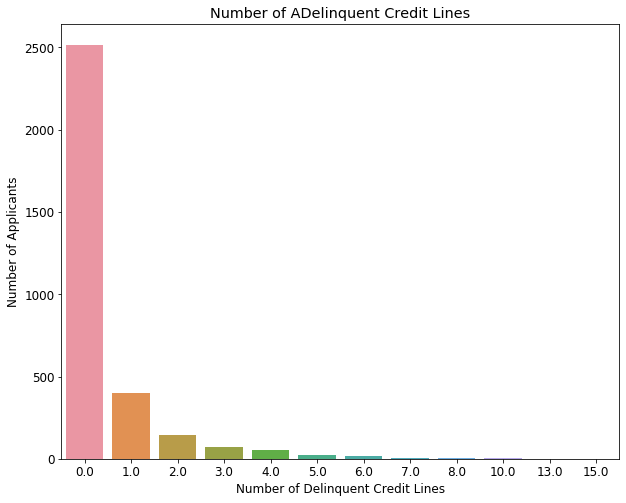

In [227]:
# Number of application according to Number of Delinquent Credit Lines
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot("delinq", data = loan)
plt.title('Number of Delinquent Credit Lines')
plt.xlabel('Number of Delinquent Credit Lines')
plt.ylabel('Number of Applicants')
plt.rcParams.update({'font.size': 12})
plt.show()

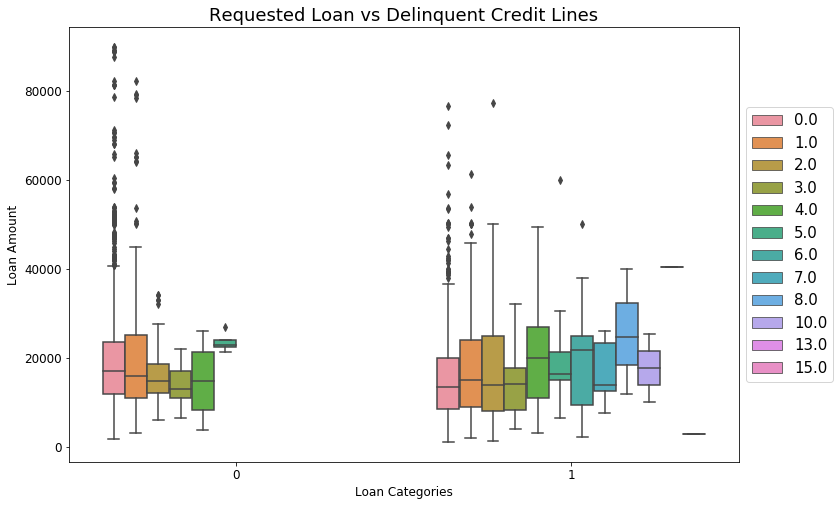

In [228]:
# Loan Payment According according to Number of Delinquent Credit Lines
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x = "bad", y = "loan", hue = "delinq", data = loan)
plt.rcParams.update({'font.size': 15})
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Requested Loan vs Delinquent Credit Lines')
plt.xlabel('Loan Categories')
plt.ylabel('Loan Amount')
plt.show()

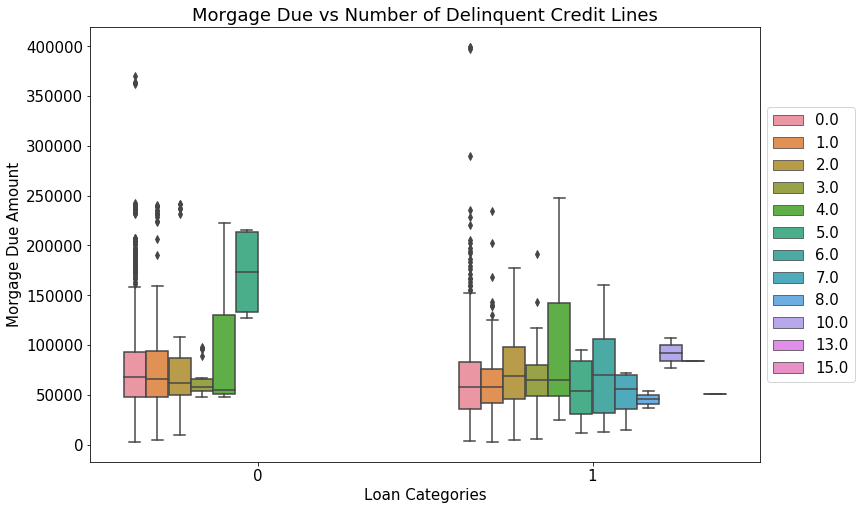

In [229]:
# Mortgage Due AMount vs according to Number of Delinquent Credit Lines
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x = "bad", y = "mortdue", hue = "delinq", data = loan)
plt.rcParams.update({'font.size': 15})
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Morgage Due vs Number of Delinquent Credit Lines')
plt.xlabel('Loan Categories')
plt.ylabel('Morgage Due Amount')
plt.show()

### 9 - Loan Repayment vs Age of Oldest Credit Line

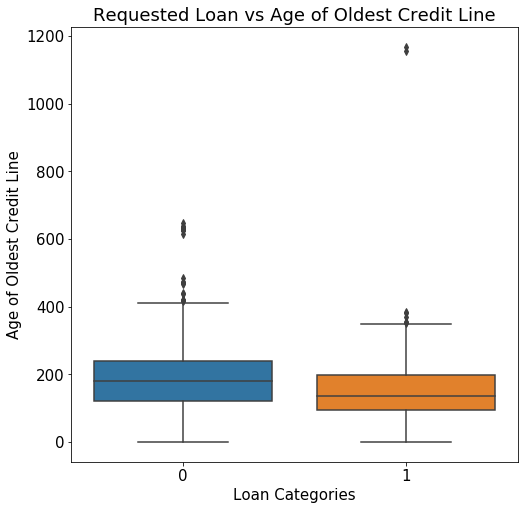

In [234]:
# Loan Payment vs Age of Oldest Credit Line
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(x = "bad", y = "clage", data = loan)
plt.rcParams.update({'font.size': 15})
plt.title('Requested Loan vs Age of Oldest Credit Line')
plt.xlabel('Loan Categories')
plt.ylabel('Age of Oldest Credit Line')
plt.show()

### 10 - Laon Repayment vs Number of recent credit lines

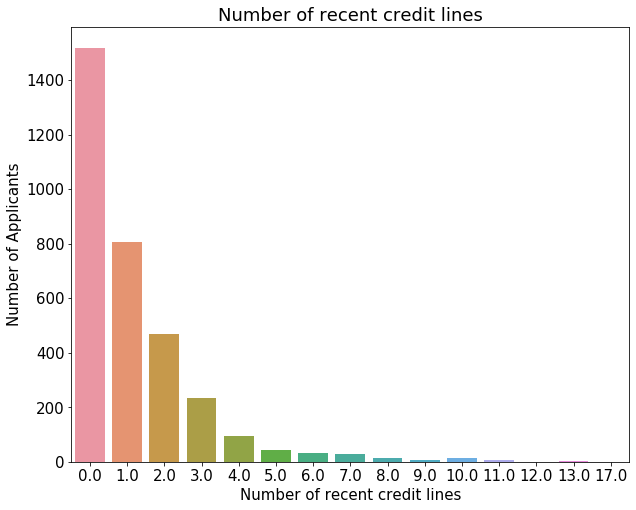

In [237]:
# Number of applications vs Number of recent credit lines
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot("ninq", data = loan)
plt.title('Number of recent credit lines')
plt.xlabel('Number of recent credit lines')
plt.ylabel('Number of Applicants')
plt.rcParams.update({'font.size': 12})
plt.show()

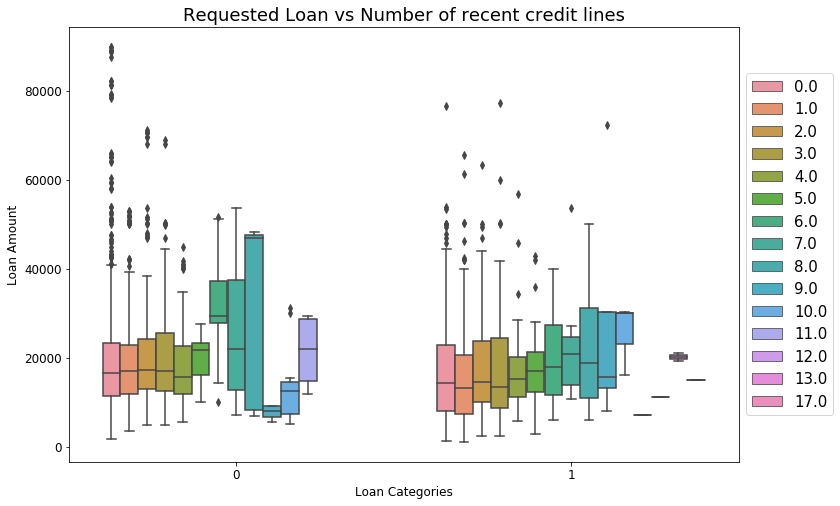

In [238]:
#Loan mount vs Number of recent credit lines
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x = "bad", y = "loan", hue = "ninq", data = loan)
plt.rcParams.update({'font.size': 15})
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Requested Loan vs Number of recent credit lines')
plt.xlabel('Loan Categories')
plt.ylabel('Loan Amount')
plt.show()

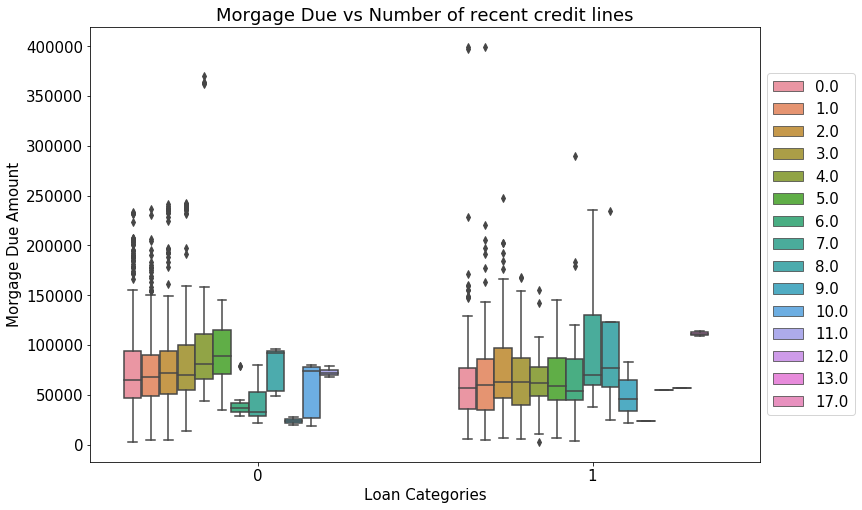

In [239]:
# Mortgage Due Amount vs Number of recent credit lines
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x = "bad", y = "mortdue", hue = "ninq", data = loan)
plt.rcParams.update({'font.size': 15})
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Morgage Due vs Number of recent credit lines')
plt.xlabel('Loan Categories')
plt.ylabel('Morgage Due Amount')
plt.show()

### 11 - Loan Repayment vs Number of credit lines

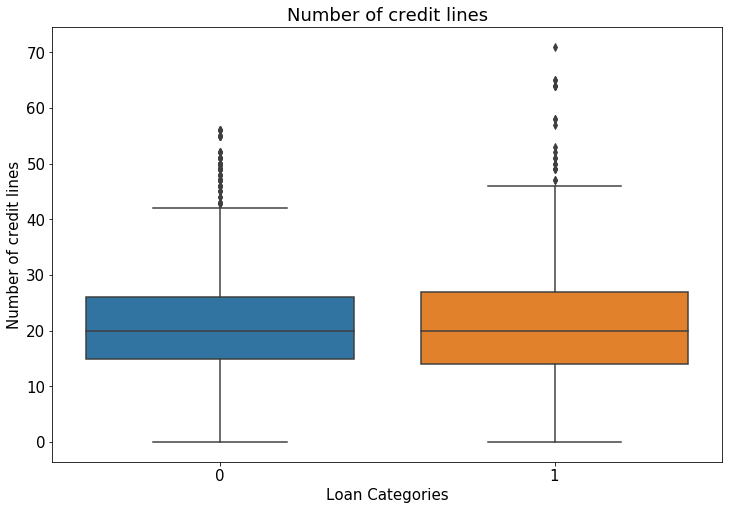

In [240]:
# Loan Repayment vs Number of credit lines
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x = "bad", y = "clno", data = loan)
plt.rcParams.update({'font.size': 15})
plt.title('Number of credit lines')
plt.xlabel('Loan Categories')
plt.ylabel('Number of credit lines')
plt.show()

In [18]:
# THose who defaulted
loan_clno = loan[["bad","clno"]]
loan_clno[loan_clno['bad']==0].drop('bad', axis=1).describe()

,clno
count,2760.000000
mean,21.552536
std,9.748456
min,0.000000
25%,15.000000
50%,20.000000
75%,26.000000
max,56.000000


In [19]:
# THose who Payed
loan_clno = loan[["bad","clno"]]
loan_clno[loan_clno['bad']==1].drop('bad', axis=1).describe()

,clno
count,683.000000
mean,21.323572
std,11.715311
min,0.000000
25%,14.000000
50%,20.000000
75%,27.000000
max,71.000000


### 12 - Loan Repayment vs Debt-to-Income Ratio

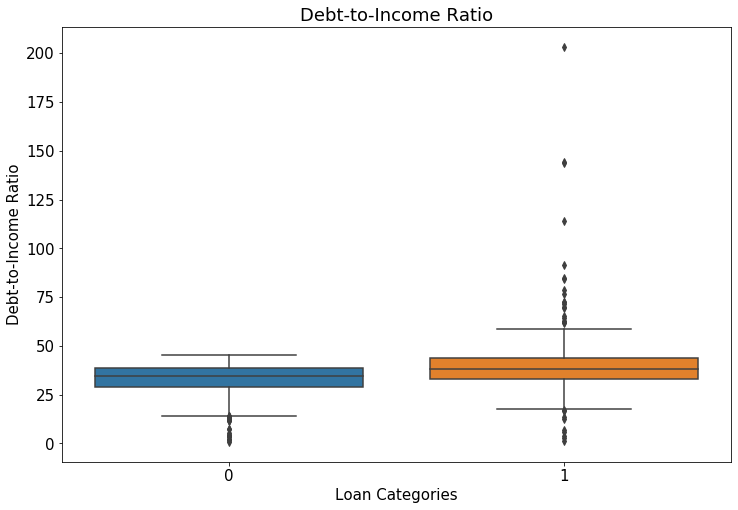

In [236]:
# Loan Repayment vs Debt-to-Income Ratio
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x = "bad", y = "debtinc", data = loan)
plt.rcParams.update({'font.size': 15})
plt.title('Debt-to-Income Ratio')
plt.xlabel('Loan Categories')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

In [20]:
# THose who defaulted
loan_debt = loan[["bad","debtinc"]]
loan_debt[loan_debt['bad']==0].drop('bad', axis=1).describe()

,debtinc
count,2571.000000
mean,33.179142
std,6.941949
min,0.720000
25%,28.887500
50%,34.476000
75%,38.643000
max,45.413000


In [22]:
# THose who Payed
loan_debt = loan[["bad","debtinc"]]
loan_debt[loan_debt['bad']==1].drop('bad', axis=1).describe()

,debtinc
count,238.000000
mean,40.881416
std,19.895419
min,1.029000
25%,33.241500
50%,38.246000
75%,43.708000
max,203.312000
